In [16]:
import torch

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-12 Python-3.8.13 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


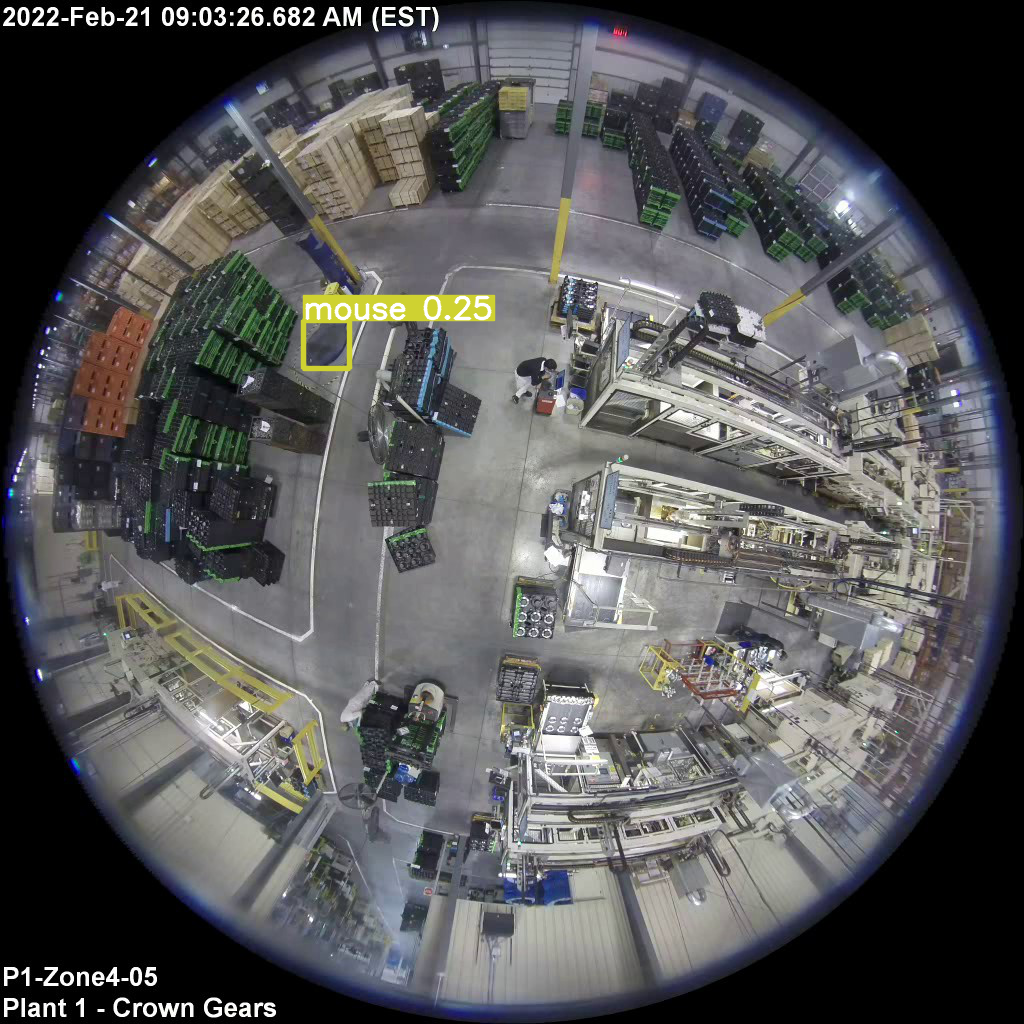

In [17]:
# Experimentation with a simple YOLO Model

model = torch.hub.load('ultralytics/yolov5', 'yolov5l')
img = './video_frames/frame_2023.jpg'

results = model(img) # Run Inference

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
bounding_boxes = 